In [283]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

In [284]:
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.ToTensor(),
    transforms.Resize((64,64))
])

In [285]:
dataset_train = ImageFolder(
    "/Users/abhishekwaghchaure/Desktop/PWSkillsDataScience/DataSets/clouds/clouds_test",
    transform=train_transforms
)

In [286]:
dataset_train[2]

(tensor([[[0.0000, 0.0000, 0.1985,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0018, 0.2221,  ..., 0.0117, 0.0016, 0.0000],
          [0.0000, 0.0127, 0.3182,  ..., 0.2961, 0.2167, 0.2007],
          ...,
          [0.1126, 0.1146, 0.1490,  ..., 0.1053, 0.0040, 0.0000],
          [0.0000, 0.0009, 0.0059,  ..., 0.0865, 0.0006, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0857, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.2806,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0023, 0.3014,  ..., 0.0148, 0.0021, 0.0000],
          [0.0000, 0.0165, 0.4133,  ..., 0.3748, 0.2797, 0.2652],
          ...,
          [0.2073, 0.2153, 0.2792,  ..., 0.2002, 0.0077, 0.0000],
          [0.0000, 0.0016, 0.0110,  ..., 0.1569, 0.0011, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.1504, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.3565,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0029, 0.3800,  ..., 0.0183, 0.0026, 0.0000],
          [0.0000, 0.0206, 0.5162,  ...,

In [287]:
dataset_train[155]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 3)

## Displaying Images

In [288]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [289]:

dataloader_train = DataLoader(
  dataset_train, shuffle=True, batch_size=10
)


In [290]:
import torchvision
import numpy as np

torch.Size([10, 3, 64, 64])


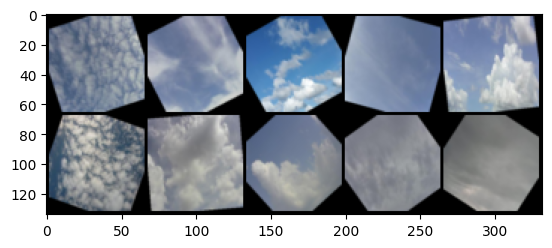

In [291]:
images, labels = next(iter(dataloader_train))

print(images.shape)  # Output will be [batch_size, 3, 64, 64]

# Display the images as a grid
grid_img = torchvision.utils.make_grid(images, nrow=5)  # Arrange the images in a grid, e.g., 5 images per row

# Convert the tensor to a NumPy array for displaying
np_img = grid_img.permute(1, 2, 0).numpy()  # Change from [C, H, W] to [H, W, C] for plotting

# Display the images
plt.imshow(np_img)
plt.show()

# Model Preparation


In [1]:
import torch.nn as nn

In [2]:
class Convolution(nn.Module):
    def __init__(self,num_classes):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3,32,kernel_size=3,padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            
            nn.Conv2d(32,64,kernel_size=3,padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            
            nn.Flatten()
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 16 * 16, num_classes) ,
            nn.Softmax(dim =1)
        )
    def forward(self,x):
        x =self.feature_extractor(x)
        x = self.classifier(x)
        return x

In [3]:
import torch.optim as optim

In [295]:
model = Convolution(num_classes=7)

criterion = nn.CrossEntropyLoss() ##loss function
optimizer = optim.Adam(model.parameters(),lr = 0.001)

In [296]:
model.parameters

<bound method Module.parameters of Convolution(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ELU(alpha=1.0)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ELU(alpha=1.0)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=16384, out_features=7, bias=True)
    (1): Softmax(dim=1)
  )
)>

In [297]:
for epoch in range(3):
    running_loss = 0.0
    # Iterate over training batches
    for images, labels in dataloader_train:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(dataloader_train)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

Epoch 1, Loss: 1.9261
Epoch 2, Loss: 1.9192
Epoch 3, Loss: 1.9192
